In [9]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import os
import seaborn as sns
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
import pims
import pySPM as spm 
import trackpy as tp
import glob
from sxmreader import SXMReader

/home/a/as/asai/dsgo/mht/lib/python3.8/site-packages/pySPM/utils/misc.py:135: UserWarning: the library tqdm cannot be found. All progressbar will be disabled.
  warn("the library tqdm cannot be found. All progressbar will be disabled.")


In [10]:
START = 298
SIZE = 5
n_range = range(START, START + SIZE)
N = len(n_range)
SXM_PATH = ["electromigration_18/Image_{0:03}.sxm".format(i) for i in n_range]
frames = SXMReader(SXM_PATH)
molecule_size = 9
min_mass = 2
max_mass = 8
min_size = 0.5
max_ecc = 1
separation = 7
searchRange = 25
adaptive_stop = 5
# frames[0] = frames[0][::-1]

In [11]:
SXM_PATH

['electromigration_18/Image_298.sxm',
 'electromigration_18/Image_299.sxm',
 'electromigration_18/Image_300.sxm',
 'electromigration_18/Image_301.sxm',
 'electromigration_18/Image_302.sxm']

Frame 4: 20 features


<Figure size 720x360 with 0 Axes>

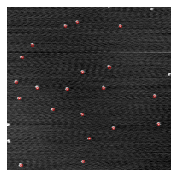

In [12]:
f = tp.batch(frames[:], molecule_size, minmass=min_mass, separation=separation)
plt.figure()

fig=plt.figure(figsize=(4, 3))
ax1=plt.axes(xlim=(0, 256), ylim=(0, 256), frameon=False)
ln, = ax1.plot([], [], lw=3)
plt.axis('off')

def update(i):
    tp.annotate(f[f['frame']==i], frames[i],  plot_style={'markersize': 0.5}, ax=ax1)
    for line in ax1.lines[:-1]:
        line.set_marker(None)
    return ln,

ani = FuncAnimation(fig, update, frames=range(len(frames)), interval=500)
ani

In [26]:
tmp = f[f.frame < ]
tmp[['frame', 'x', 'y']].to_csv('test.csv', index=False)

In [27]:
detections = f.groupby('frame').apply(lambda x : list(zip(x.x, x.y)))
detections

frame
0    [(126.10334788937409, 4.781174187287725), (171...
1    [(173.97397959183672, 11.693367346938775), (90...
2    [(165.3793103448276, 19.074112197632527), (47....
3    [(58.82929242949035, 14.43394359228105), (168....
4    [(81.77078327727054, 17.528111484863047), (67....
dtype: object

In [ ]:
from openmht.mht import MHT
params = {
    'image_area' : 192 ** 2,
    'gating_area' : 50 ** 2,
    'k' : 0,
    'q' : 0.00001,
    'r' : 0.01,
    'n' : 1,
}
MHT(detections, params).run()

2020-11-24 20:05:34 Generating track trees...
2020-11-24 20:05:34 Frame 0: 20 detections
2020-11-24 20:05:34 Calculating MWIS...
2020-11-24 20:05:40 MWIS complete.
2020-11-24 20:05:40 Pruned 0 branch(es) at frame N-1
2020-11-24 20:05:40 Frame 1: 20 detections
2020-11-24 20:05:40 Calculating MWIS...


Frame 4: 20 trajectories present.


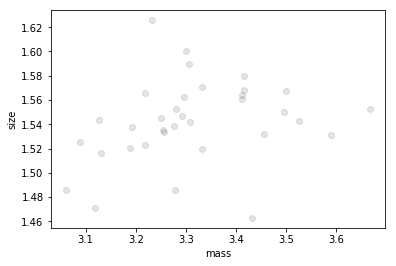

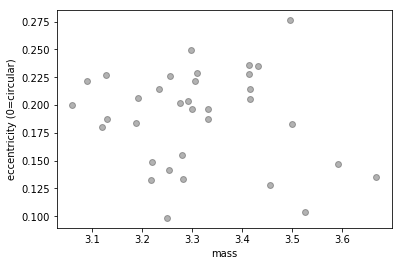

In [5]:

#t = tp.link(f, search_range=searchRange)#, adaptive_step=0.99)
t = tp.link(f, search_range=searchRange)#, adaptive_step=0.99)
plt.figure()
tp.mass_size(t.groupby('particle').mean()); # convenience function -- just plots size vs. mass
tp.mass_ecc(t.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [6]:
t1 = t[((t['mass'] > min_mass) & (t['size'] > min_size) &
         (t['ecc'] < max_ecc)) & (t['mass'] < max_mass)]
t2 = tp.filter_stubs(t, 2)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t2['particle'].nunique())

Before: 34
After: 27


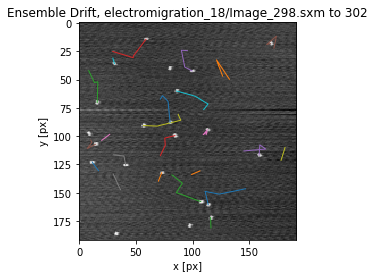

In [7]:
plt.title("Ensemble Drift, " + SXM_PATH[0] + " to {}".format(n_range[-1]))
tp.plot_traj(t2[(t2['frame']<=3)], superimpose=frames[3], label=False)

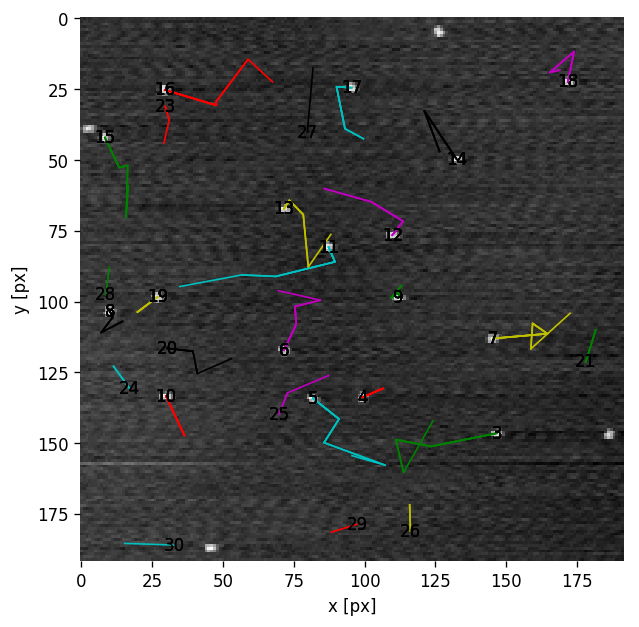

In [8]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

fig=plt.figure(figsize=(8, 6), dpi=120)
ax1=plt.axes(xlim=(0, 256), ylim=(0, 256), frameon=False)
plt.axis('on')
ln, = ax1.plot([], [], lw=3)
ax1.set_prop_cycle(color=['g', 'r', 'c', 'm', 'y', 'k'])

def update(i):
#     tp.plot_traj(t2[(t2['frame']<=i)], superimpose=frames[i], label=False, ax=ax1)
    tp.plot_traj(t2[(t2['frame']<=i)], superimpose=frames[i], label=True, ax=ax1)
    ax1.set_prop_cycle(color=['g', 'r', 'c', 'm', 'y', 'k'])
    return ln,

ani = FuncAnimation(fig, update, frames=range(len(frames)), interval=1000)
ani